# 시각화 데모
- 이 밑은 안해도 됨

In [ ]:
import numpy as np
# PCA방식 : 차원축소 방식 알고리즘, 자주 이용되는 방식이긴 하지만 군집의 변별력을 해친다는 단점
# PCA를 개선한 방법이 t-SNE 차원 축소 방식
from sklearn.manifold import TSNE
# 고차원 데이터의 군집구조를 2,3차원 데이터로 시각화
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import animation

In [ ]:
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# n_components=2 : 2차원으로 변경, learning_rate(학습률) : 자동조절,
tsne = TSNE(n_components=3, learning_rate = 'auto', init = 'random')
transformed = tsne.fit_transform(np.array(list(review['llm_embedding'].values)))
# 고차원의 데이터를 저차원의 방식으로 전환

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
x_axis_tsne = transformed[:, 0] # index 0열
y_axis_tsne = transformed[:, 1] # index 1열
z_axis_tsne = transformed[:, 2] # index 2열

In [ ]:
tsne = TSNE(n_components=3, learning_rate = 'auto', init = 'random',perplexity=5)
mbti_transformed = tsne.fit_transform(np.array(list(mbti_df['embedding'])))

mbti_x_axis_tsne = mbti_transformed[:, 0] # index 0열
mbti_y_axis_tsne = mbti_transformed[:, 1] # index 1열
mbti_z_axis_tsne = mbti_transformed[:, 2] # index 2열

In [ ]:
def plot_tsne_graph(vocabs, x_axis, y_axis,z_axis,mbti, mbti_x_axis, mbti_y_axis,mbti_z_axis):
    fig, ax = plt.subplots(ncols=1, figsize=(25, 25), subplot_kw={"projection":"3d"})
    #plt.figure(figsize=(30,30))
    ax.scatter(x_axis, y_axis, z_axis, marker='o')
    for i, v in enumerate(vocabs):
        ax.text(x_axis[i], y_axis[i], z_axis[i],v)
    # ax.scatter(mbti_x_axis, mbti_y_axis,mbti_z_axis, marker='x', color='red')
    # for i, v in enumerate(mbti):
    #     ax.text(mbti_x_axis[i], mbti_y_axis[i],mbti_z_axis[i],v ,color='blue')

    
    return fig,


    

(<Figure size 2500x2500 with 1 Axes>,)

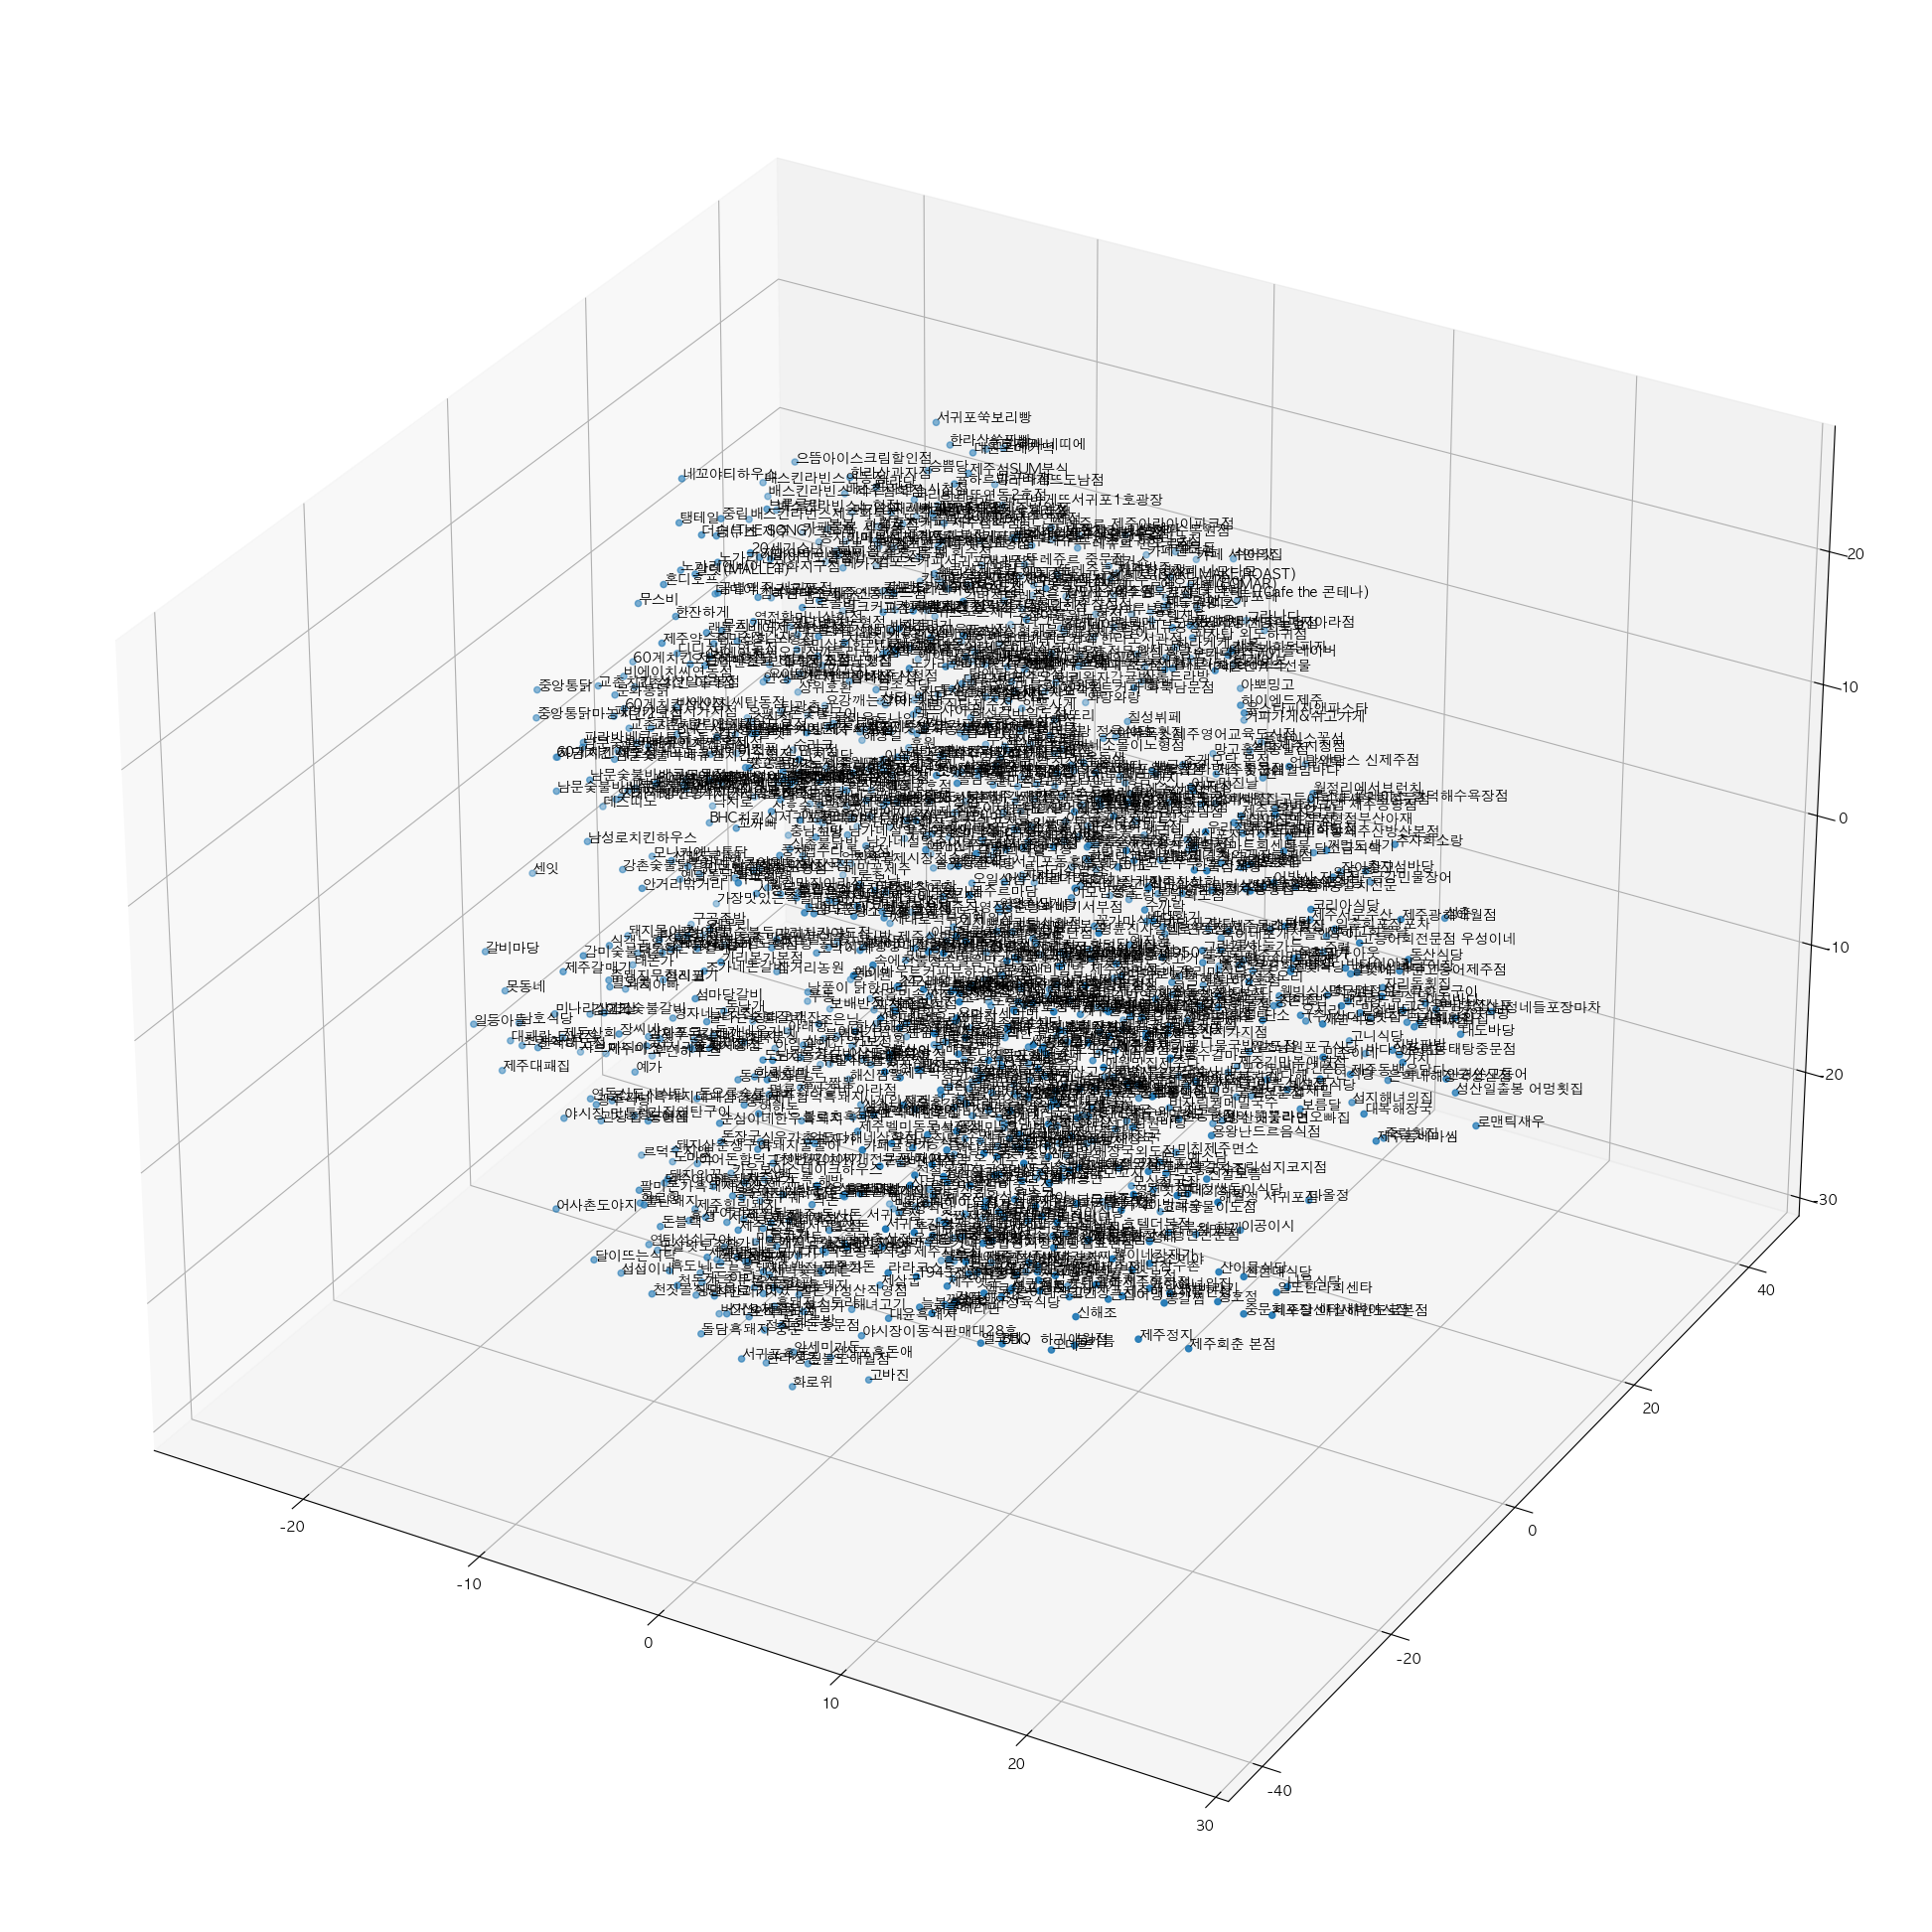

In [ ]:
plot_tsne_graph(review['MCT_NM'], x_axis_tsne, y_axis_tsne,z_axis_tsne ,mbti_df['mbti'], mbti_x_axis_tsne, mbti_y_axis_tsne,mbti_z_axis_tsne)
# vocabs : 시각화할 데이터(단어, 리스트)
# x_axis_tsne : x축 좌표
# y_axis_tsne : y축 좌표

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


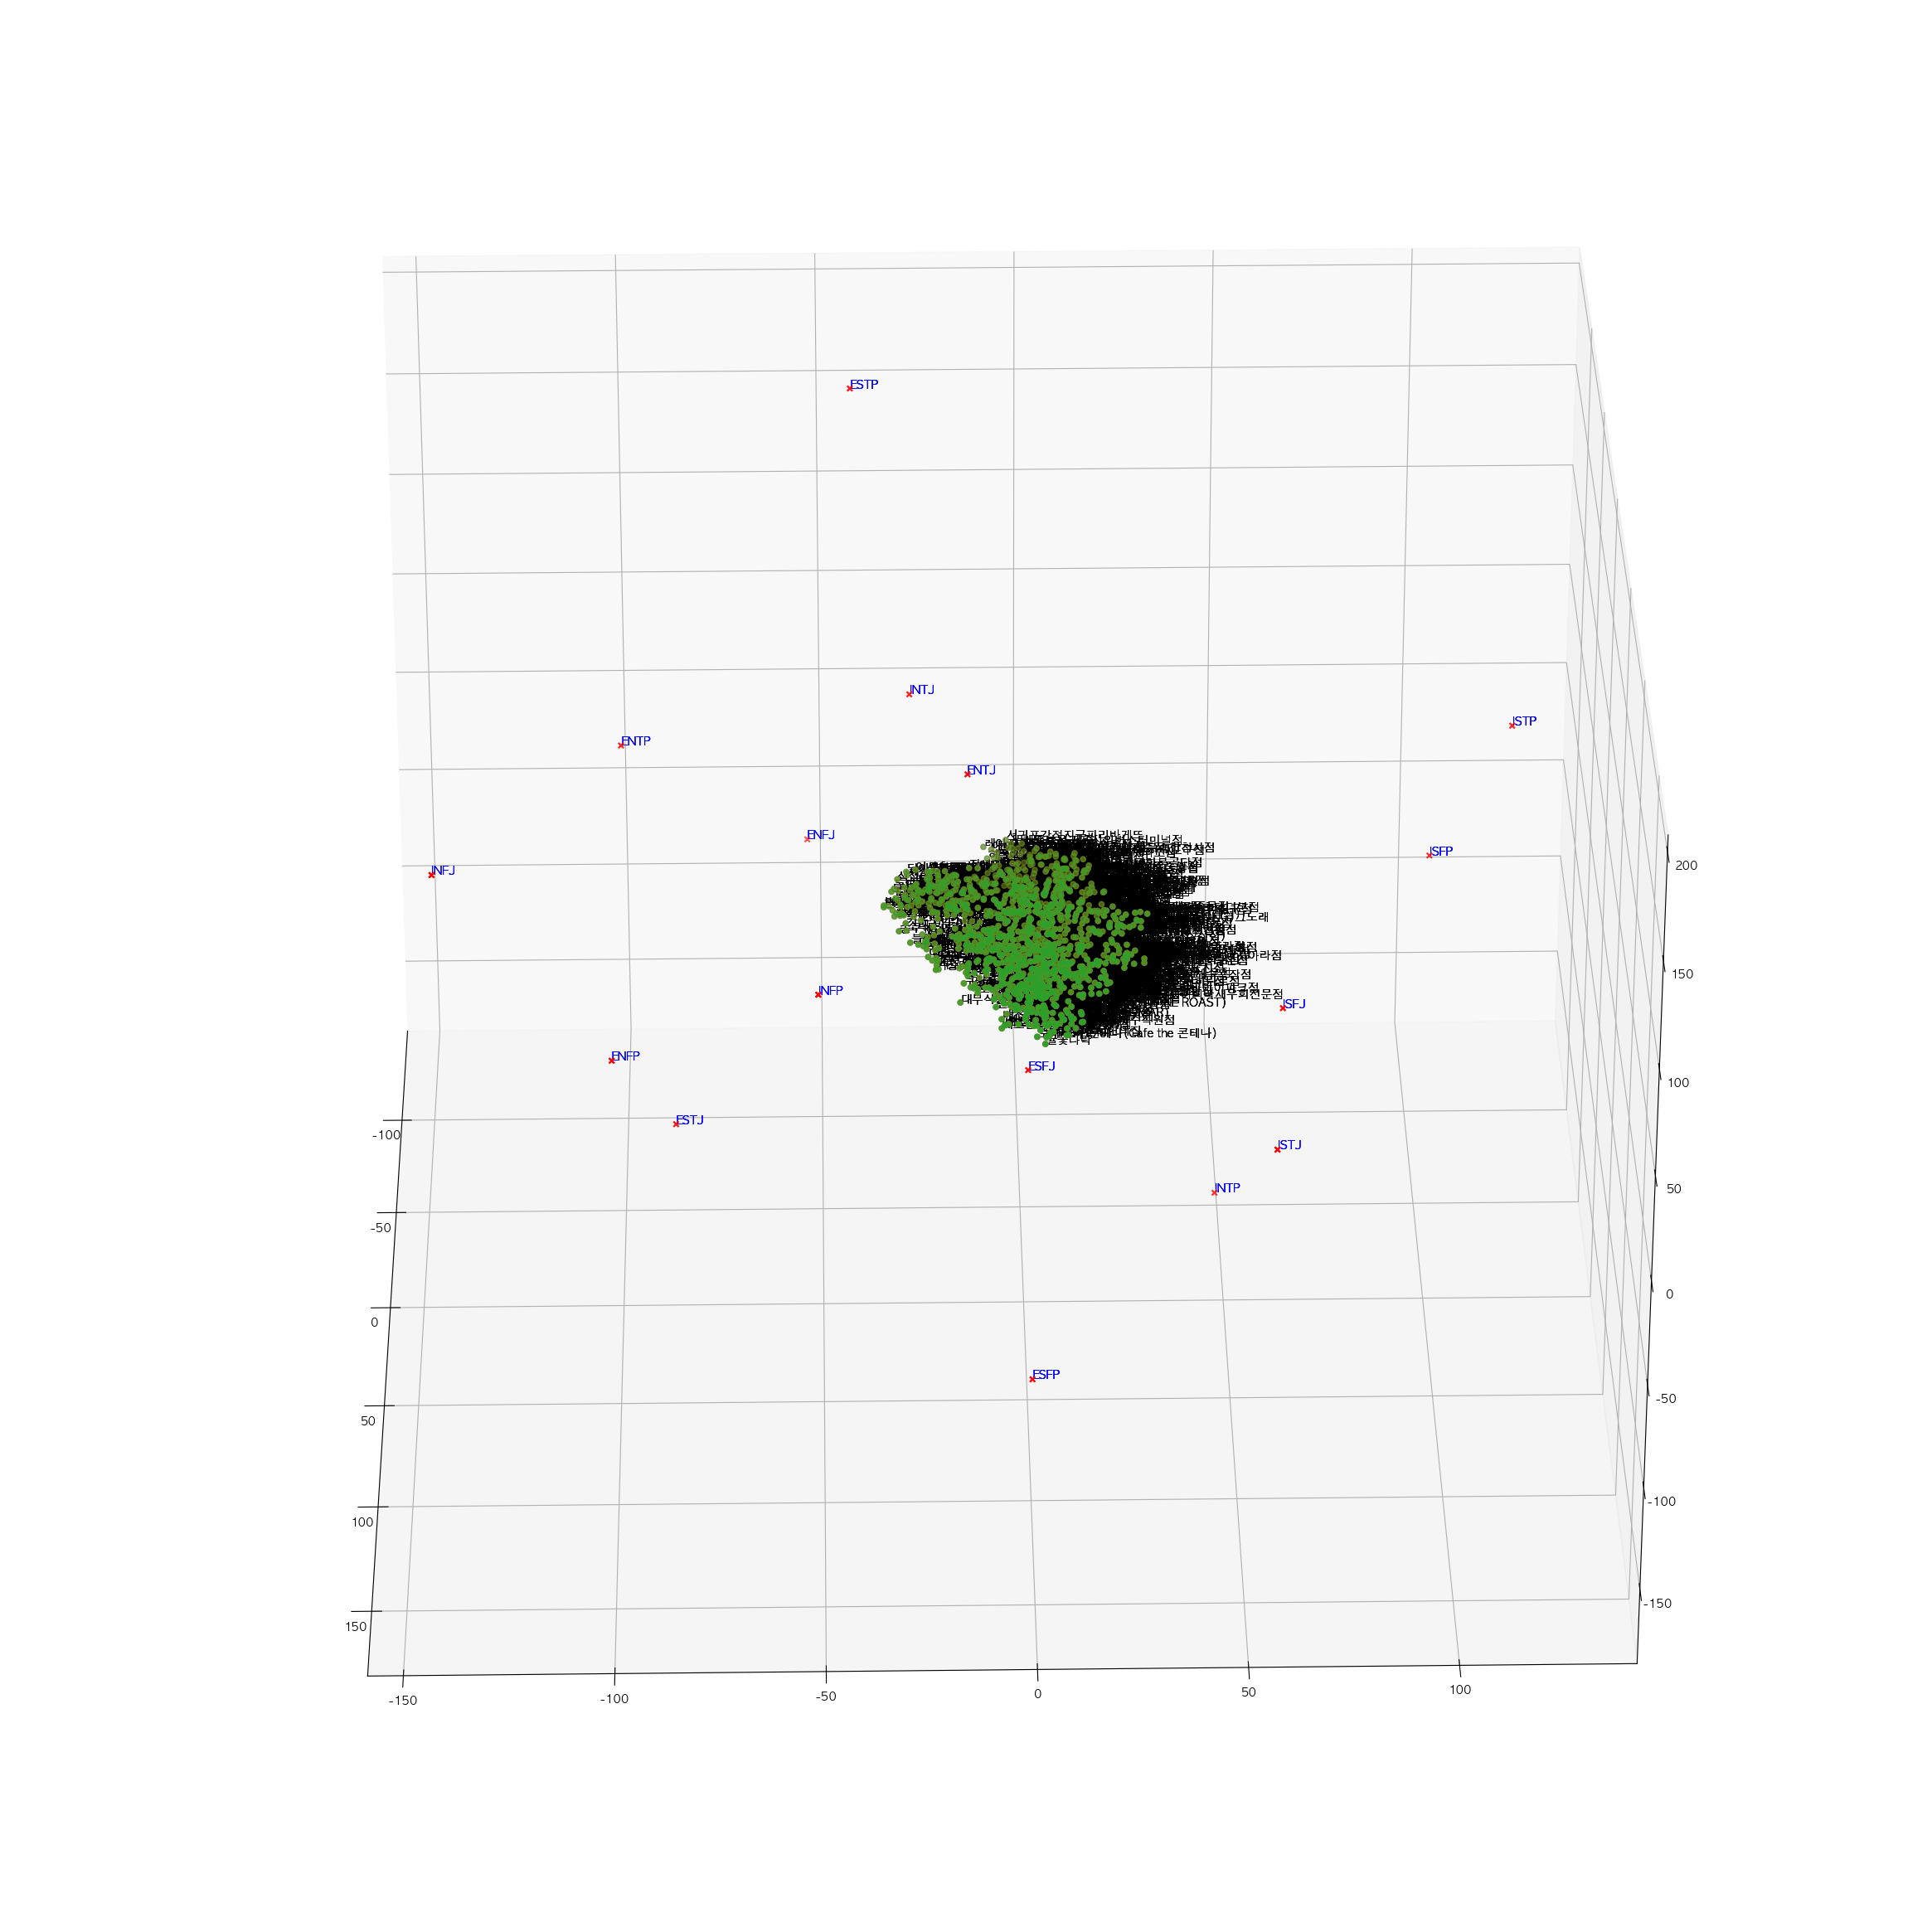

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(30, 30), subplot_kw={"projection":"3d"})
def init():
    ax.scatter(x_axis_tsne, y_axis_tsne, z_axis_tsne, marker='o')
    for i, v in enumerate(review['MCT_NM']):
        ax.text(x_axis_tsne[i], y_axis_tsne[i], z_axis_tsne[i],v)
    ax.scatter(mbti_x_axis_tsne, mbti_y_axis_tsne,mbti_z_axis_tsne, marker='x', color='red')
    for i, v in enumerate(mbti_df['mbti']):
        ax.text(mbti_x_axis_tsne[i], mbti_y_axis_tsne[i],mbti_z_axis_tsne[i],v ,color='blue')

    #fontlabel = {"fontsize":"large", "color":"gray", "fontweight":"bold"}

    # def init():
    #     ydata = "Y"
    #     ax.set_xlabel("X", fontdict=fontlabel, labelpad=16)
    #     ax.set_ylabel(ydata, fontdict=fontlabel, labelpad=16)
    #     ax.set_title("Z", fontdict=fontlabel)
    
    #     ax.scatter(data["X"], data[ydata], data["Z"], 
    #             c=data["Z"], cmap="inferno", s=5, alpha=0.5)
        
    #     return fig,
    return fig,
    
def animate(i):
    ax.view_init(elev=30., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                            frames=360, interval=20, blit=True)
# Save
anim.save('mpl3d_scatter.gif', fps=30)